In [2]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
from pycaret.classification import *

Stage of behavior prediction

In [5]:
data = pd.read_pickle('data/fitbit_ttm_to_model.pkl')
data

,id,date,stage,ttm_consciousness_raising,ttm_dramatic_relief,ttm_environmental_reevaluation,ttm_self_reevaluation,ttm_social_liberation,ttm_counterconditioning,ttm_helping_relationships,ttm_reinforcement_management,ttm_self_liberation,ttm_stimulus_control,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,Normal,Obese,Overweight,Underweight,below_30s,above_30s,True,False,FEMALE,MALE,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-07-26,Maintenance,1.333333,2.666667,2.333333,4.333333,4.000000,4.000000,4.000000,4.000000,4.000000,1.666667,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,0.700,0.733333,-2.000223,2493.46,62.81010,8924.7,72.003219,121.0,25.0,61.0,698.0,NaN,61.369921,32100000.0,0.0,449.0,86.0,0.0,95.0,1.402597,1.048780,0.793220,1.138298,12090.0,119.0,1293.0,1.0,0.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2eaf67b776a2406b14ac,2021-11-29,Contemplation,3.333333,2.666667,4.000000,4.666667,4.000000,2.333333,3.000000,4.333333,3.333333,1.000000,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,1921.91,44.28773,8322.0,83.228228,264.0,16.0,16.0,655.0,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,0,0,0,1,0,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2eaf67b776a2406b14ac,2022-01-17,Action,3.666667,2.333333,4.333333,4.333333,3.333333,1.666667,3.000000,4.333333,3.333333,3.000000,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,0.650,0.733333,-2.539780,2286.29,47.39134,11591.8,82.763199,346.0,31.0,32.0,522.0,NaN,68.757643,30540000.0,0.0,457.0,52.0,0.0,94.0,1.193182,0.896552,1.048583,1.056818,16618.0,280.0,1152.0,8.0,0.0,0,0,0,1,0,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,621e2ed667b776a24085d8d1,2021-06-07,Preparation,1.000000,2.000000,3.000000,3.333333,3.333333,1.000000,1.000000,3.333333,1.666667,1.000000,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,1607.00,37.11574,2158.5,84.841948,135.0,0.0,0.0,545.0,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2f3967b776a240c654db,2021-05-31,Preparation,2.000000,2.000000,2.666667,4.000000,5.000000,2.333333,2.000000,3.000000,2.333333,2.000000,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,2034.95,49.36558,3880.2,81.079290,82.0,24.0,11.0,768.0,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,1,0,0,0,0,1,0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2f6167b776a240e082a9,2021-06-01,Contemplation,3.000000,4.666667,3.000000,5.000000,2.666667,2.000000,2.333333,4.666667,4.666667,4.000000,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,2089.24,39.61306,5256.9,71.121094,198.0,29.0,15.0,651.0,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,0,0,1,0,0,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,621e2f7a67b776a240f14425,2021-05-31,Maintenance,2.333333,1.333333,1.333333,4.3

In [6]:
data = data.drop(columns=['ttm_counterconditioning', 'ttm_dramatic_relief', 'ttm_self_liberation', 'ttm_self_reevaluation', 'ttm_social_liberation', 'ttm_environmental_reevaluation', 'ttm_consciousness_raising', 'ttm_helping_relationships', 'ttm_reinforcement_management', 'ttm_stimulus_control', 'filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
data

,id,date,stage,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-07-26,Maintenance,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,0.700,0.733333,-2.000223,2493.46,8924.7,72.003219,121.0,25.0,61.0,698.0,NaN,61.369921,32100000.0,0.0,449.0,86.0,0.0,95.0,1.402597,1.048780,0.793220,1.138298,12090.0,119.0,1293.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2eaf67b776a2406b14ac,2021-11-29,Contemplation,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,1921.91,8322.0,83.228228,264.0,16.0,16.0,655.0,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2eaf67b776a2406b14ac,2022-01-17,Action,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,0.650,0.733333,-2.539780,2286.29,11591.8,82.763199,346.0,31.0,32.0,522.0,NaN,68.757643,30540000.0,0.0,457.0,52.0,0.0,94.0,1.193182,0.896552,1.048583,1.056818,16618.0,280.0,1152.0,8.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,621e2ed667b776a24085d8d1,2021-06-07,Preparation,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,1607.00,2158.5,84.841948,135.0,0.0,0.0,545.0,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2f3967b776a240c654db,2021-05-31,Preparation,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,2034.95,3880.2,81.079290,82.0,24.0,11.0,768.0,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2f6167b776a240e082a9,2021-06-01,Contemplation,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,2089.24,5256.9,71.121094,198.0,29.0,15.0,651.0,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,621e2f7a67b776a240f14425,2021-05-31,Maintenance,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,2545.38,3118.8,64.904003,146.0,21.0,34.0,816.0,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,621e2f9167b776a240011ccb,2021-11-28,Precontemplation,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,1708.05,2917.7,73.184689,208.0,0.0,0.0,663.0,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,621e2fb367b776a24015accd,2021-05-31,Contemplation,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,3242.22,5818.6,92.037961,156.0,31.0,89.0,753.0,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,621e2fb367b776a24015accd,2021-07-26,Action,NaN,NaN,NaN,NaN,NaN,NaN,N

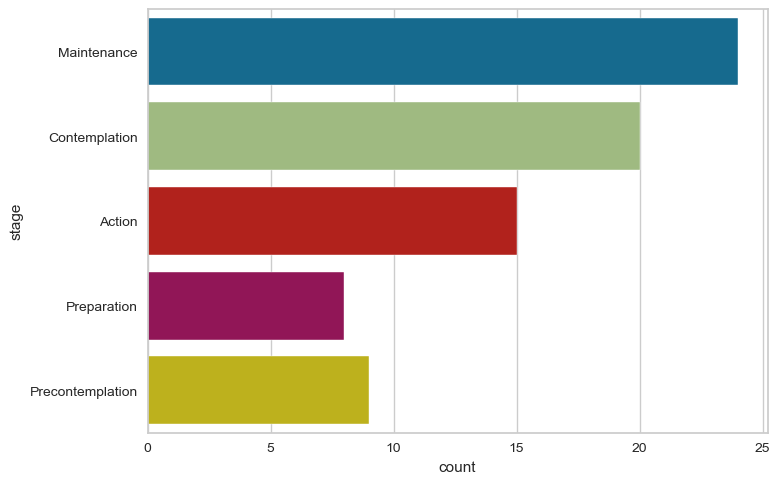

In [7]:
sns.countplot(y="stage", data=data)

In [ ]:
s = setup(data=data, target='stage', silent=True, fix_imbalance=True, session_id=123)

In [9]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

Breq self-determination prediction

In [12]:
data = pd.read_pickle('data/fitbit_breq_to_model.pkl')
data

,id,date,breq_amotivation,breq_external_regulation,breq_introjected_regulation,breq_identified_regulation,breq_intrinsic_regulation,breq_self_determination,nightly_temperature,nremhr,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,1.00,1.00,1.000000,3.50,4.25,intrinsic_regulation,34.476865,58.652,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-07-26,1.00,1.00,1.666667,3.50,4.00,intrinsic_regulation,34.212037,56.034,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2eaf67b776a2406b14ac,2021-11-29,1.25,1.00,1.666667,4.50,3.75,identified_regulation,34.693016,77.985,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2eaf67b776a2406b14ac,2022-01-17,1.00,1.25,2.333333,4.00,3.50,identified_regulation,34.152692,70.546,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e2ed667b776a24085d8d1,2021-06-07,2.75,2.00,3.000000,2.50,1.00,introjected_regulation,34.084118,79.669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,621e36c267b776a240ba2756,2021-05-31,1.00,1.00,1.000000,3.75,4.75,intrinsic_regulation,33.094862,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,621e36f967b776a240e5e7c9,2021-05-31,1.00,1.75,4.666667,4.00,3.25,introjected_regulation,34.052594,64.918,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73,621e36f967b776a240e5e7c9,2021-07-26,1.00,1.75,5.000000,4.75,3.25,introjected_regulation,34.354848,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,621e375b67b776a240290cdc,2021-06-01,1.00,1.00,1.666667,3.50,2.75,identified_regulation,34.863055,62.353,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
data = data.drop(columns=['breq_amotivation', 'breq_external_regulation', 'breq_introjected_regulation', 'breq_identified_regulation', 'breq_intrinsic_regulation', 'filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
data

,id,date,breq_self_determination,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,intrinsic_regulation,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-07-26,intrinsic_regulation,34.212037,56.034,81.741,NaN,15.6,80.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2eaf67b776a2406b14ac,2021-11-29,identified_regulation,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2eaf67b776a2406b14ac,2022-01-17,identified_regulation,34.152692,70.546,27.536,NaN,14.4,74.0,0.866667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e2ed667b776a24085d8d1,2021-06-07,introjected_regulation,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,621e36c267b776a240ba2756,2021-05-31,intrinsic_regulation,33.094862,NaN,NaN,NaN,NaN,80.0,0.766667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,621e36f967b776a240e5e7c9,2021-05-31,introjected_regulation,34.052594,64.918,54.922,95.7,15.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73,621e36f967b776a240e5e7c9,2021-07-26,introjected_regulation,34.354848,NaN,NaN,96.2,14.8,81.0,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,621e375b67b776a240290cdc,2021-06-01,identified_regulation,34.863055,62.353,25.833,NaN,16.8,72.0,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


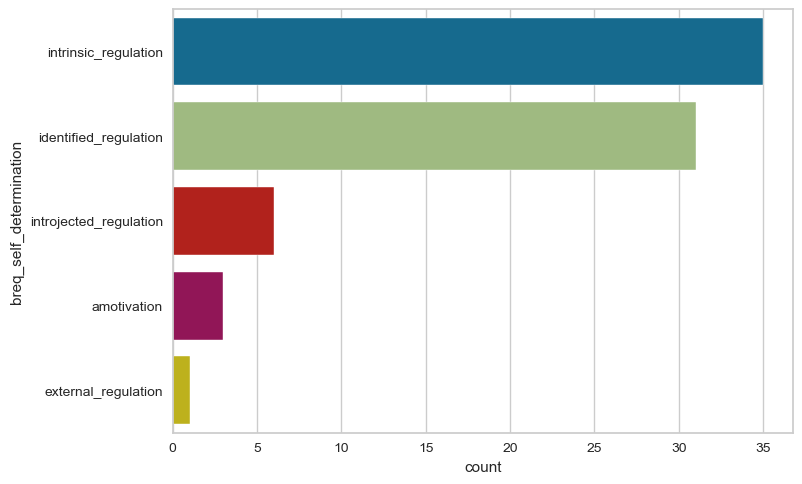

In [14]:
sns.countplot(y="breq_self_determination", data=data)

In [ ]:
s = setup(data=data, target='breq_self_determination', silent=True, fix_imbalance=True, session_id=123)

In [21]:
best = compare_models()

In [ ]:
plot_model(best, plot='feature')

Big-5 personality prediction

In [24]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')
data

,id,date,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,21.0,33.0,45.0,42.0,40.0,MALE,LOW,LOW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2eaf67b776a2406b14ac,2021-11-29,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,HIGH,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2ed667b776a24085d8d1,2021-06-07,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,AVERAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e2f3967b776a240c654db,2021-05-31,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,AVERAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2f6167b776a240e082a9,2021-06-01,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,AVERAGE,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,621e2f7a67b776a240f14425,2021-05-31,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,AVERAGE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,621e2f9167b776a240011ccb,2021-11-28,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,HIGH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,621e2fb367b776a24015accd,2021-05-31,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,AVERAGE,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,621e2fce67b776a240279baa,2021-05-31,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,HIGH,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,621e2ff067b776a2403eb737,2021-11-29,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,HIGH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


predict extraversion

In [19]:
data = data.drop(columns=['ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category', 'filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
data

,id,date,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,nightly_temperature,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,21.0,33.0,45.0,42.0,40.0,MALE,LOW,34.476865,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2eaf67b776a2406b14ac,2021-11-29,32.0,45.0,30.0,18.0,41.0,FEMALE,AVERAGE,34.693016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2ed667b776a24085d8d1,2021-06-07,40.0,43.0,22.0,28.0,34.0,FEMALE,HIGH,34.084118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e2f3967b776a240c654db,2021-05-31,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,33.124766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2f6167b776a240e082a9,2021-06-01,41.0,41.0,30.0,34.0,30.0,FEMALE,HIGH,34.535430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,621e2f7a67b776a240f14425,2021-05-31,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,33.562092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,621e2f9167b776a240011ccb,2021-11-28,21.0,45.0,31.0,18.0,39.0,FEMALE,LOW,33.388456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,621e2fb367b776a24015accd,2021-05-31,37.0,36.0,29.0,27.0,41.0,MALE,HIGH,34.312944,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,621e2fce67b776a240279baa,2021-05-31,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,34.379283,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,621e2ff067b776a2403eb737,2021-11-29,33.0,44.0,23.0,11.0,30.0,FEMALE,AVERAGE,34.013545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


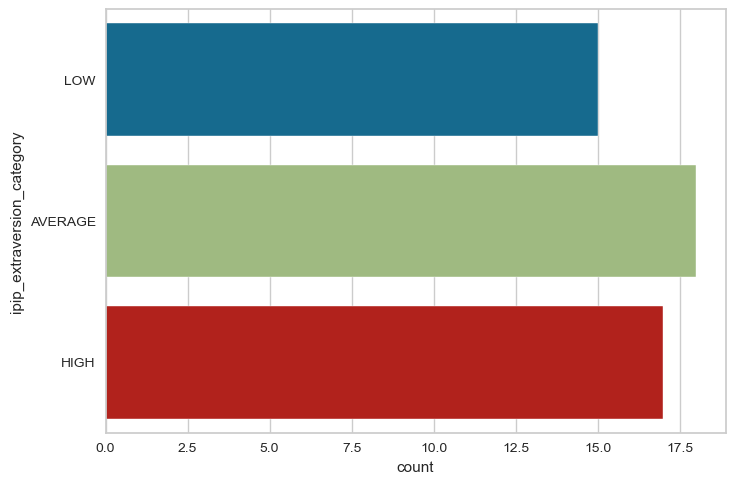

In [20]:
sns.countplot(y="ipip_extraversion_category", data=data)

In [21]:
s = setup(data=data, target='ipip_extraversion_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,2058
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 62)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,27
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8583,0.8917,0.8333,0.7833,0.8094,0.7756,0.8212,0.0540
dt,Decision Tree Classifier,0.8000,0.8500,0.7833,0.7542,0.7622,0.6892,0.7300,0.0230
gbc,Gradient Boosting Classifier,0.6750,0.8250,0.6667,0.6167,0.6278,0.5036,0.5490,0.1170
rf,Random Forest Classifier,0.6250,0.7583,0.6167,0.5125,0.5417,0.4273,0.5069,0.1120
lda,Linear Discriminant Analysis,0.5167,0.7792,0.5333,0.5069,0.4750,0.2818,0.3225,0.0190
et,Extra Trees Classifier,0.4167,0.6042,0.4000,0.3583,0.3794,0.0968,0.1071,0.1010
knn,K Neighbors Classifier,0.4000,0.5771,0.4000,0.3069,0.3275,0.1028,0.1145,0.0470
lightgbm,Light Gradient Boosting Machine,0.3500,0.5000,0.3333,0.1292,0.1867,0.0000,0.0000,0.1670
dummy,Dummy Classifier,0.3500,0.5000,0.3333,0.1292,0.1867,0.0000,0.0000,0.0140
svm,SVM - Linear Kernel,0.3250,0.0000,0.3333,0.1104,0.1633,0.0000,0.0000,0.0220


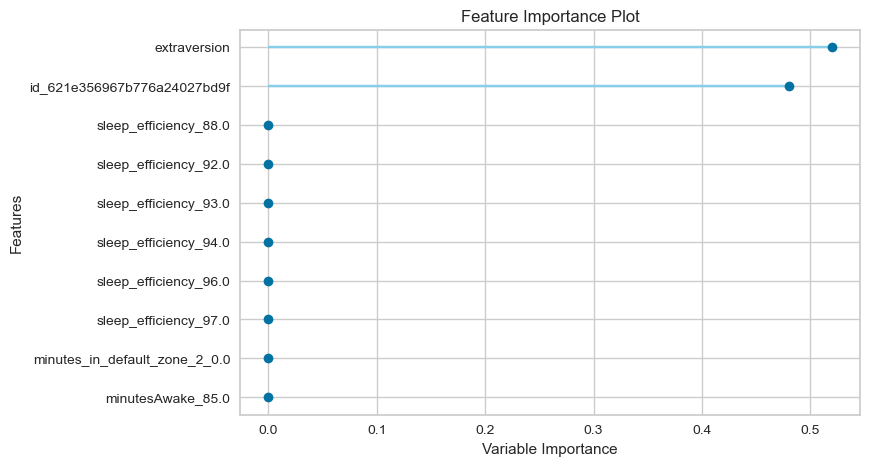

In [23]:
plot_model(best, plot='feature')

predict agreeableness

In [25]:
data = data.drop(columns=['filteredDemographicVO2Max', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

,id,date,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_agreeableness_category,nightly_temperature,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,21.0,33.0,45.0,42.0,40.0,MALE,LOW,34.476865,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2eaf67b776a2406b14ac,2021-11-29,32.0,45.0,30.0,18.0,41.0,FEMALE,HIGH,34.693016,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2ed667b776a24085d8d1,2021-06-07,40.0,43.0,22.0,28.0,34.0,FEMALE,AVERAGE,34.084118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e2f3967b776a240c654db,2021-05-31,25.0,34.0,30.0,39.0,37.0,MALE,AVERAGE,33.124766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,621e2f6167b776a240e082a9,2021-06-01,41.0,41.0,30.0,34.0,30.0,FEMALE,AVERAGE,34.535430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,621e2f7a67b776a240f14425,2021-05-31,29.0,38.0,43.0,39.0,35.0,MALE,AVERAGE,33.562092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,621e2f9167b776a240011ccb,2021-11-28,21.0,45.0,31.0,18.0,39.0,FEMALE,HIGH,33.388456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,621e2fb367b776a24015accd,2021-05-31,37.0,36.0,29.0,27.0,41.0,MALE,AVERAGE,34.312944,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,621e2fce67b776a240279baa,2021-05-31,34.0,42.0,35.0,27.0,35.0,MALE,HIGH,34.379283,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,621e2ff067b776a2403eb737,2021-11-29,33.0,44.0,23.0,11.0,30.0,FEMALE,HIGH,34.013545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


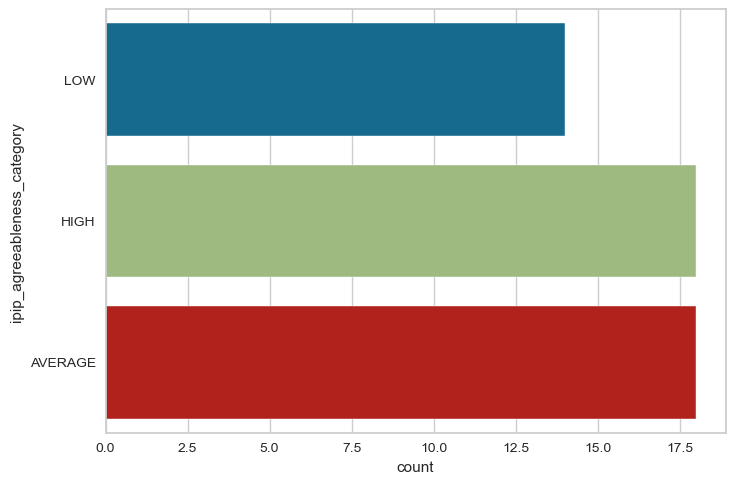

In [26]:
sns.countplot(y="ipip_agreeableness_category", data=data)

In [27]:
s = setup(data=data, target='ipip_agreeableness_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,8239
1,Target,ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 62)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


In [29]:
best = compare_models()

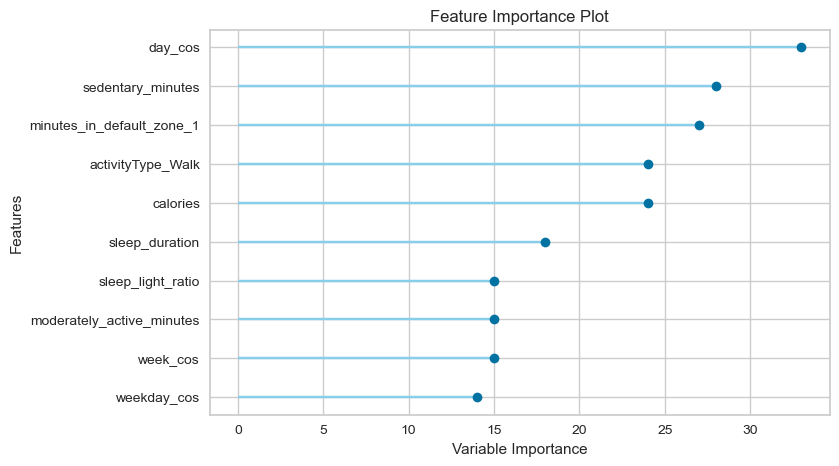

In [31]:
plot_model(best, plot='feature')

predict conscientiousness

In [17]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_conscientiousness_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,AVERAGE
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,LOW
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,AVERAGE
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,AVERAGE
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0,

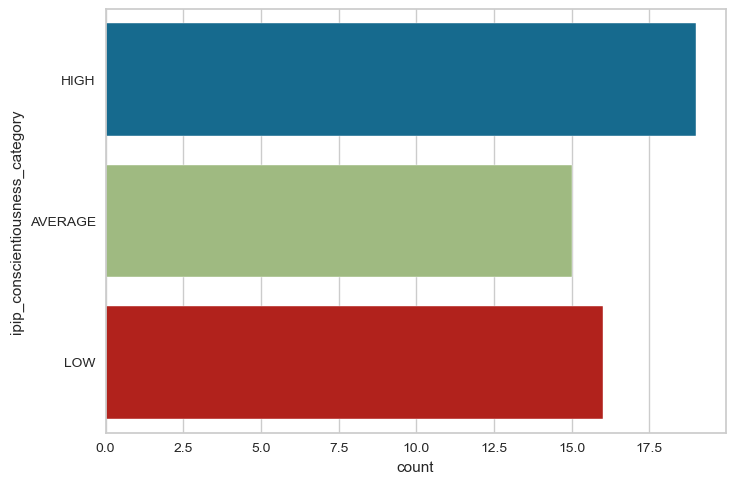

In [18]:
sns.countplot(y="ipip_conscientiousness_category", data=data)

In [33]:
s = setup(data=data, target='ipip_conscientiousness_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,3432
1,Target,ipip_conscientiousness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4500,0.6271,0.4833,0.3278,0.3556,0.1985,0.2688,0.0280
ada,Ada Boost Classifier,0.4333,0.6458,0.4500,0.3292,0.3589,0.1867,0.1978,0.0630
ridge,Ridge Classifier,0.4083,0.0000,0.4167,0.2965,0.3208,0.1217,0.1670,0.0200
rf,Random Forest Classifier,0.3583,0.5062,0.3667,0.2646,0.2822,0.0573,0.0800,0.1440
lda,Linear Discriminant Analysis,0.3583,0.6125,0.3333,0.2958,0.3167,0.0245,0.0102,0.0170
lr,Logistic Regression,0.3333,0.5958,0.3167,0.2062,0.2417,-0.0089,-0.0201,0.0330
svm,SVM - Linear Kernel,0.3250,0.0000,0.3333,0.1104,0.1633,0.0000,0.0000,0.0250
lightgbm,Light Gradient Boosting Machine,0.3250,0.5000,0.3333,0.1104,0.1633,0.0000,0.0000,0.0220
dummy,Dummy Classifier,0.3250,0.5000,0.3333,0.1104,0.1633,0.0000,0.0000,0.0270
gbc,Gradient Boosting Classifier,0.3083,0.4542,0.3167,0.2007,0.2308,-0.0155,0.0025,0.1340


In [35]:
plot_model(best, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

predict stability

In [19]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_stability_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,LOW
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,AVERAGE
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,HIGH
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,LOW
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,LOW
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0,1224.0,13.0,0.0,-8

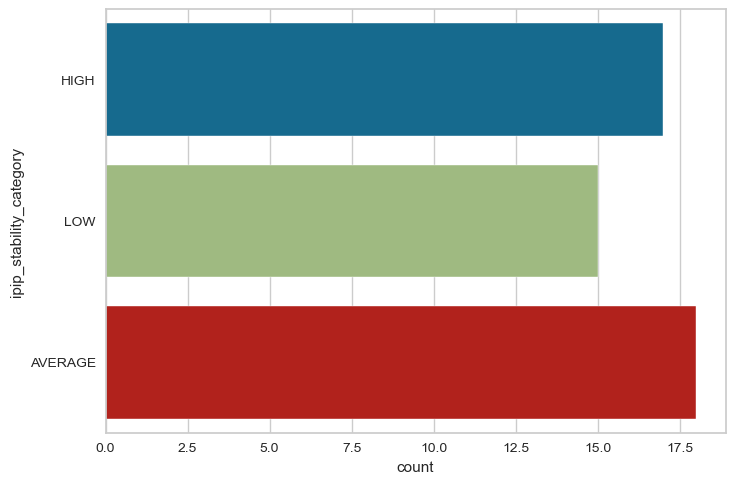

In [20]:
sns.countplot(y="ipip_stability_category", data=data)

In [37]:
s = setup(data=data, target='ipip_stability_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,8311
1,Target,ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.3750,0.4583,0.3167,0.1479,0.1950,0.0222,0.0258,1.0840
lightgbm,Light Gradient Boosting Machine,0.3750,0.4500,0.3000,0.1229,0.1767,0.0000,0.0000,1.0910
dummy,Dummy Classifier,0.3750,0.4500,0.3000,0.1229,0.1767,0.0000,0.0000,0.0250
knn,K Neighbors Classifier,0.3583,0.5083,0.3333,0.1889,0.2317,0.0020,0.0035,0.0360
lr,Logistic Regression,0.3250,0.4708,0.3000,0.2042,0.2347,-0.0500,-0.0465,0.0170
svm,SVM - Linear Kernel,0.3250,0.0000,0.4000,0.1354,0.1967,0.0000,0.0000,0.8900
ridge,Ridge Classifier,0.2833,0.0000,0.2667,0.2000,0.1972,-0.0924,-0.1206,0.0260


In [39]:
plot_model(best, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

predict intellect

In [21]:
data = fitbit_big5.drop(columns=['id', 'date', 'age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
data

,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_intellect_category
0,34.476865,58.652,109.509,NaN,14.8,84.0,0.933333,0.725,0.900000,-2.577960,None,2300.02,62.10474,6822.5,[Walk],69.314358,149,23,34,655,False,NaN,63.121265,34740000.0,0.0,497.0,82.0,0.0,96.0,1.025974,1.078947,1.090909,1.311111,9245.0,65.0,1365.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
1,34.693016,77.985,18.475,NaN,15.2,76.0,0.900000,0.725,0.666667,-1.549357,None,1921.91,44.28773,8322.0,[Walk],83.228228,264,16,16,655,False,NaN,75.914960,29340000.0,0.0,439.0,50.0,0.0,91.0,1.757143,0.961538,0.917031,1.218391,12038.0,189.0,1179.0,1.0,0.0,-8.660254e-01,0.000000,0.587785,-3.943559e-01,0.5,1.000000,-0.809017,0.918958,HIGH
2,34.084118,79.669,16.876,NaN,22.6,NaN,NaN,NaN,NaN,-1.858786,None,1607.00,37.11574,2158.5,None,84.841948,135,0,0,545,False,NaN,76.445022,45600000.0,0.0,634.0,126.0,0.0,95.0,1.225352,2.032258,1.492188,1.460177,3255.0,159.0,1271.0,0.0,0.0,-2.449294e-16,0.000000,0.809017,9.884683e-01,1.0,1.000000,0.587785,0.151428,AVERAGE
3,33.124766,75.366,22.920,NaN,16.6,75.0,0.933333,0.800,0.500000,-0.819009,None,2034.95,49.36558,3880.2,None,81.079290,82,24,11,768,False,NaN,71.928869,33300000.0,0.0,471.0,84.0,0.0,91.0,1.074766,1.217391,0.808824,1.373737,5765.0,153.0,1169.0,0.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
4,34.535430,62.976,31.453,94.6,13.8,74.0,0.666667,0.700,0.866667,-1.627421,None,2089.24,39.61306,5256.9,[Walk],71.121094,198,29,15,651,False,NaN,63.703736,32820000.0,0.0,471.0,76.0,0.0,93.0,0.985294,1.551020,1.440171,0.817073,7593.0,40.0,1400.0,0.0,0.0,-2.449294e-16,0.781831,0.587785,2.012985e-01,1.0,0.623490,0.809017,0.979530,LOW
5,33.562092,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,-0.463412,[LIFETIME_FLOORS],2545.38,54.23355,3118.8,[Bike],64.904003,146,21,34,816,False,NaN,50.641582,25380000.0,0.0,385.0,38.0,1.0,94.0,1.211765,0.791667,0.921053,0.402174,6507.0,40.0,1363.0,4.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
6,33.388456,58.525,34.320,95.6,14.4,81.0,0.933333,0.650,0.900000,-2.278614,None,1708.05,43.00380,2917.7,None,73.184689,208,0,0,663,False,17.397482,63.539226,34140000.0,0.0,514.0,55.0,0.0,99.0,1.442308,1.341463,1.311628,1.670213,4167.0,228.0,1087.0,3.0,1.0,-8.660254e-01,-0.781831,0.809017,-5.712682e-01,0.5,0.623490,-0.587785,0.820763,HIGH
7,34.312944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.812942,None,3242.22,49.87196,5818.6,"[Workout, Walk]",92.037961,156,31,89,753,False,NaN,67.944025,24660000.0,0.0,373.0,38.0,0.0,97.0,0.000000,0.844444,1.042194,1.223301,8025.0,201.0,1044.0,51.0,3.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,HIGH
8,34.379283,73.504,21.036,98.0,15.2,82.0,0.966667,0.825,0.666667,-1.125404,None,2605.75,43.64833,4661.7,"[Workout, Walk]",91.085160,59,37,46,726,False,NaN,82.494796,34320000.0,0.0,505.0,67.0,1.0,94.0,1.262136,1.116667,1.060185,1.280702,6411.0,291.0,1106.0,28.0,0.0,-8.660254e-01,0.000000,0.587785,-2.449294e-16,0.5,1.000000,0.809017,1.000000,AVERAGE
9,34.013545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.689651,None,2790.29,29.18892,6394.7,None,82.724045,261,46,30,560,False,NaN,73.014971,32580000.0,0.0,481.0,62.0,1.0,94.0,0.831169,1.087719,1.263374,0.852713,10291.0,193.0,122

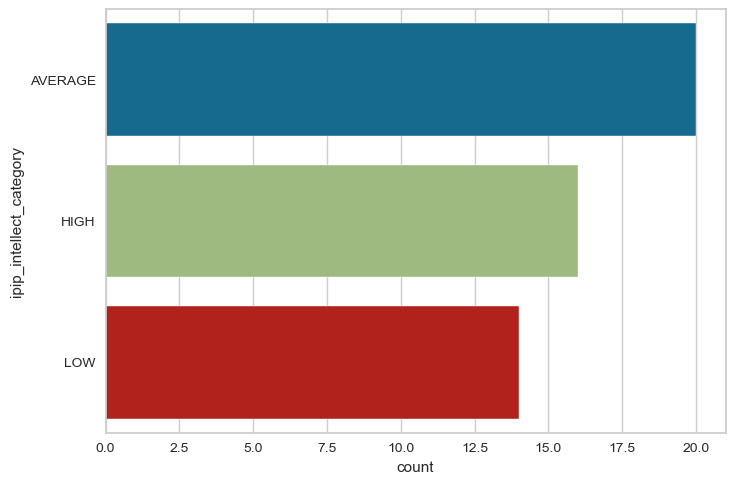

In [22]:
sns.countplot(y="ipip_intellect_category", data=data)

In [41]:
s = setup(data=data, target='ipip_intellect_category', silent=True, fix_imbalance=True)

,Description,Value
0,session_id,8528
1,Target,ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(50, 47)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3583,0.4500,0.3000,0.0993,0.1467,0.0000,0.0000,0.9860
dummy,Dummy Classifier,0.3583,0.4500,0.3000,0.0993,0.1467,0.0000,0.0000,0.0200
lr,Logistic Regression,0.3500,0.5833,0.3667,0.2389,0.2706,0.0178,0.0337,0.0180
qda,Quadratic Discriminant Analysis,0.3250,0.4417,0.4000,0.1785,0.2217,-0.0152,-0.0129,0.7830


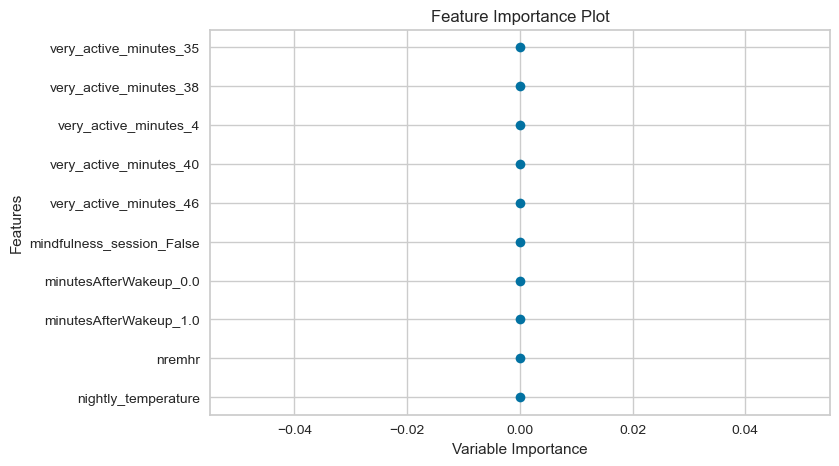

In [43]:
plot_model(best, plot='feature')